In [12]:
#Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.io as pio
import plotly.graph_objects as go
import os
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA

#printing all outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

#Suppressing warnings
import warnings
warnings.simplefilter(action = "ignore")

# Where to save the figures
PROJECT_ROOT_DIR = "/project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images")
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="jpeg", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    #if tight_layout:
     #   plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)


## HSE (Health Safety Environment) Events

**Source:** Fennex Database - extractd data from Azure Data Studio<br> 
**Info:** This dataset includes *Date of incident*, *Rig Name*, *Form ID*, *Event Description* written by the workers and *IADC (International Association of Drilling Contractors) Injury Classification*

In [13]:
#Importing HSE data
hse = pd.read_csv("./Datasets/hse_events.csv")
hse.head()

,Date,Rig Name,Form ID,Event Description,IADC Injury Classification
0,03/01/2019,Noble Lloyd Noble,20190301111422,At 1525hrs on Friday the 1st March 2019 a NLN ...,Medical Treatment Only
1,06/01/2019,Noble Don Taylor,20190601033008,"An employee reported to the medic for ""not fee...",First Aid Incident
2,07/01/2019,Noble Sam Hartley,20190701133627,?Theemployee has experiencedswelling inthe lef...,Medical Treatment Only
3,10/01/2019,Noble Bob Douglas,20191001110759,"?On 10/01/2019 at 1045, the employee was using...",First Aid Incident
4,12/01/2019,Noble Don Taylor,20191201144351,?Crew member attended the hospital to report s...,First Aid Incident


In [14]:
# print dataset shape to see what it consists of
print('The dataset has {0} rows and {1} columns'.format(hse.shape[0],hse.shape[1]))

The dataset has 600 rows and 5 columns


In [15]:
from functions import share_missing_values
share_missing_values(hse)

,share_of_missing_values,count_of_unique_values
IADC Injury Classification,1.5%,5
Date,0.0%,457
Rig Name,0.0%,28
Form ID,0.0%,600
Event Description,0.0%,597


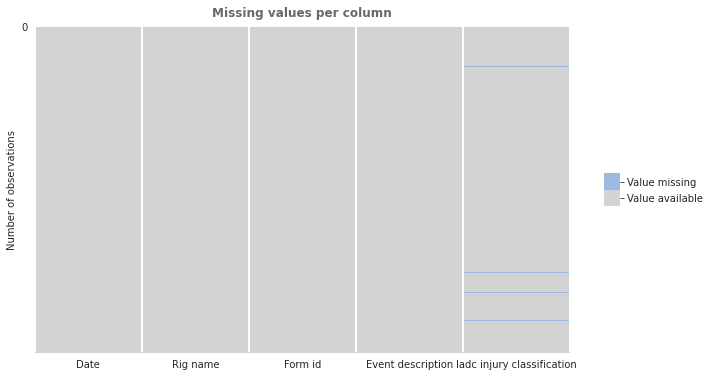

In [16]:
from functions import viz_missing_values
sns.set_style("darkgrid")
viz_missing_values(hse)

In [17]:
# Do we need a correlation matrix?

In [18]:
#Checking the variables data types to check if Date variable is in datetime
hse.dtypes

Date                          object
Rig Name                      object
Form ID                        int64
Event Description             object
IADC Injury Classification    object
dtype: object

In [19]:
#Convert Date column to datetime type for easier manipulations 
hse['Date']= pd.to_datetime(hse['Date'])

#Extract year, month and day and add them to new columns
hse['year'] = pd.to_datetime(hse['Date']).dt.year
hse['month'] = pd.to_datetime(hse['Date']).dt.month
hse['month_name'] = pd.to_datetime(hse['Date']).dt.month_name()
hse['day'] = pd.to_datetime(hse['Date']).dt.day
hse['day_name'] = pd.to_datetime(hse['Date']).dt.day_name()
#hse['year_month'] = pd.to_datetime(hse['Date']).dt.strftime('%b-%Y')
hse['year_month'] = pd.to_datetime(hse['Date']).dt.strftime('%Y-%m')

#Keep only the rows from the period we require (2021-01-01 to 2022-01-01)
hse = hse[hse["Date"] > "2020-10-01"]
hse = hse[hse["Date"] < "2022-03-31"]
hse = hse.sort_values("year", ascending=False)

#resetting index and dropping the column index
hse = hse.reset_index(drop=True)
hse.head()

# print updated dataset shape to see what it consists of
print('The dataset has {0} rows and {1} columns'.format(hse.shape[0],hse.shape[1]))

,Date,Rig Name,Form ID,Event Description,IADC Injury Classification,year,month,month_name,day,day_name,year_month
0,2022-03-10,Noble Tom Madden,20220310111010,"On 10-Mar-2022 at 0730 hrs., the drill crew wa...",First Aid Incident,2022,3,March,10,Thursday,2022-03
1,2022-02-26,Noble Tom Madden,20220227060042,?A JSL Roustabout reported tothe rigdoctor and...,First Aid Incident,2022,2,February,26,Saturday,2022-02
2,2022-01-17,Noble Globetrotter I,20220117074905,?An employee reported to the Medic with a smal...,First Aid Incident,2022,1,January,17,Monday,2022-01
3,2022-01-01,Noble Sam Croft,20220101100936,?A catering employee reported to his superviso...,First Aid Incident,2022,1,January,1,Saturday,2022-01
4,2022-01-05,Noble Don Taylor,20220105222836,While manually handling a piece of metal grati...,First Aid Incident,2022,1,January,5,Wednesday,2022-01


The dataset has 244 rows and 11 columns


In [20]:
histogram = hse.groupby(["year_month"]).size().reset_index()
histogram = histogram.rename(columns = {0:"Count_of_Events"})
histogram

,year_month,Count_of_Events
0,2020-10,16
1,2020-11,13
2,2020-12,9
3,2021-01,12
4,2021-02,10
5,2021-03,7
6,2021-04,12
7,2021-05,13
8,2021-06,11
9,2021-07,13


<Figure size 1080x576 with 0 Axes>

Saving figure count_incidents_hse


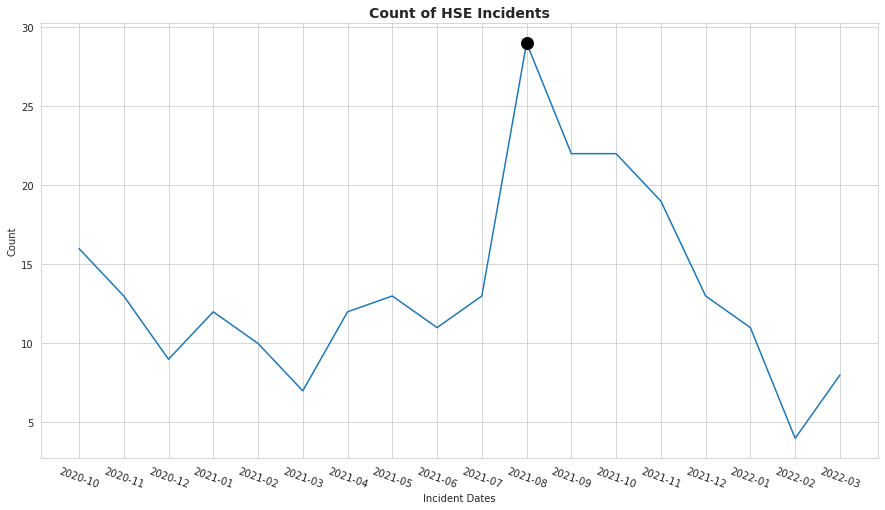

In [21]:
sns.set_style("whitegrid")

plt.figure(figsize=(15,8))
plt.plot(histogram["year_month"], histogram["Count_of_Events"],
         marker="o", ms=12, markevery=[10], markeredgecolor='black',
         markerfacecolor='black' )



_ = plt.xlabel("Incident Dates")
_ = plt.ylabel("Count")
_ = plt.title("Count of HSE Incidents", fontweight='bold', fontsize=14)
_ = plt.xticks(rotation=-20)
save_fig("count_incidents_hse")


In [22]:
#fill NaN values in the IADC Injury Classification with "No IADC Injury Classification"
hse["IADC Injury Classification"] = hse["IADC Injury Classification"].fillna("No IADC Injury Classification")
hse["IADC Injury Classification"].unique().tolist()


['First Aid Incident',
 'Restricted Work Incident',
 'Evaluation Only',
 'Medical Treatment Only',
 'No IADC Injury Classification']

Saving figure injury_types


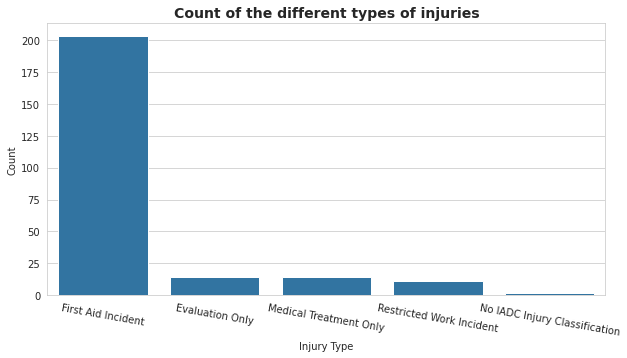

In [23]:
#Visualise the Injury Classifications in a bar plot 
# for data exploration purposes
sns.set_style("whitegrid")
plt.figure(figsize=(10, 5))
hse["IADC Injury Classification"].value_counts()

ax = sns.countplot(x="IADC Injury Classification", 
                   data=hse, 
                   order = hse["IADC Injury Classification"].value_counts(ascending=False).index,
                   color="tab:blue"
             )
_ = ax.set_xlabel("Injury Type")
_ = ax.set_ylabel("Count")
_ = ax.set_title("Count of the different types of injuries", fontweight='bold', fontsize=14)
plt.xticks(rotation=-10)
save_fig("injury_types")
plt.show();





Saving figure Presence_of_injuries_per_rig


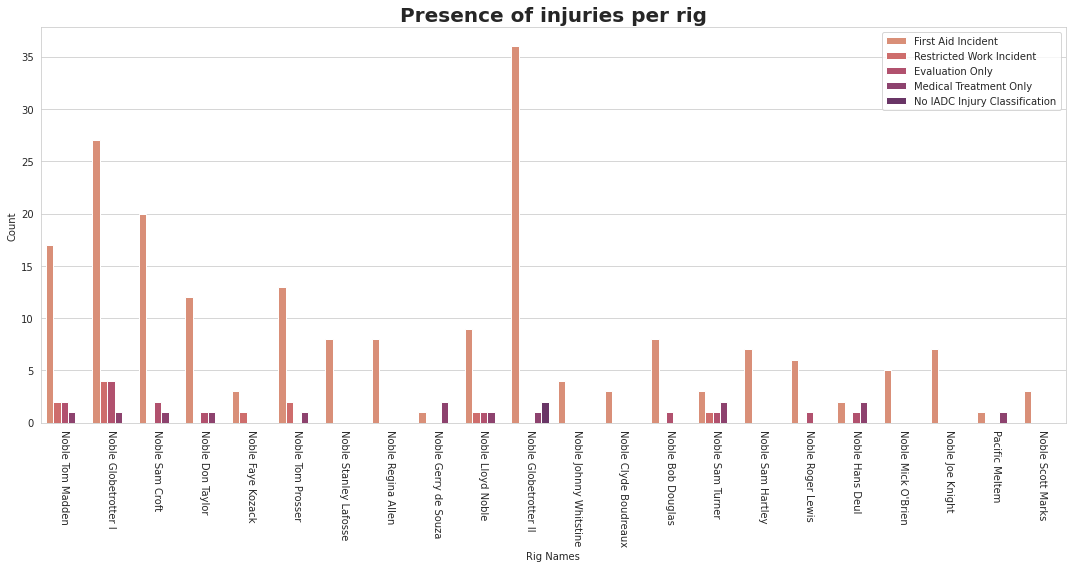

In [24]:
#Visualise the Injury Classifications in a bar plot
# for data exploration purposes

plt.figure(figsize=(15,8))

ax = sns.countplot(x="Rig Name", 
                   data=hse, 
                   hue="IADC Injury Classification",
                   palette= "flare");
#ticks = ["No", "Yes"]
#_ = ax.set_xticklabels(ticks)
_ = ax.set_title("Presence of injuries per rig", fontweight='bold', fontsize=20)
_ = ax.set_xlabel("Rig Names")
_ = ax.set_ylabel("Count")
_ = plt.legend(loc='upper right')
plt.xticks(rotation=-90)
plt.tight_layout()
save_fig("Presence_of_injuries_per_rig")
plt.show();


In [25]:
pacific = hse[(hse["Rig Name"]=="Pacific Meltem")].index
hse = hse.drop(pacific)


In [26]:
# Export cleaned Dataset
hse.to_csv("./Datasets/Cleaned_HSE.csv")

## Alpha Beta Data

**Source:** Fennex Database - extractd data from Azure Data Studio<br> 
**Info:** This dataset includes <br> 
*Full_Name* --> Name of rig worker,<br> 
*Rig* --> Rig name <br> 
*Category* --> i.e. is the rig worker noble personnel, operator, etc.<br> 
*Company* --> Company rig worker is working for<br> 
*Position* --> Rig worker's position<br> 
*Alpha* --> This value is linked to performance<br> 
*Beta*<br> 
*Days_Worked* --> How many days the specific rig worker has worked for<br> 
*Total_Cards* --> i.e. how many positive/negative reports rig worker has raised<br> *Processed_Date*<br> 
*No_of_Days* --> i.e. this calculates alpha and beta values for the past 120 days

In [27]:
#Importing cleaned data
#It contains dates from 2021-01-01 to 2022-03-31
ab = pd.read_csv("./Datasets/alpha_beta_historical.csv")
ab.head()

,RowId,Full_Name,Rig,Category,Company,Position,Alpha,Beta,Days_Worked,Total_Cards,Processed_Date,No_of_Days
0,1488944,xxxx,NBD,Operator Services,Halliburton,Data Engineer,-1.542964,0.0,71,0,2021-01-01 00:00:00.000,120
1,1488945,xxxx,NDoT,Noble National,JSL,Roustabout,-1.542964,0.0,28,0,2021-01-01 00:00:00.000,120
2,1488946,xxxx,NTP,Noble Personnel,Noble,Motorman,-1.542964,0.0,50,0,2021-01-01 00:00:00.000,120
3,1488947,xxxx,NTP,Operator Services,TMS,TMT ROV Operator,-1.542964,0.0,23,0,2021-01-01 00:00:00.000,120
4,1488948,xxxx,NDoT,Operator Services,C Innovation,CI,-1.542964,0.0,33,0,2021-01-01 00:00:00.000,120


In [28]:
ab = ab.drop(columns = ["RowId"])
ab.dtypes

Full_Name          object
Rig                object
Category           object
Company            object
Position           object
Alpha             float64
Beta              float64
Days_Worked         int64
Total_Cards         int64
Processed_Date     object
No_of_Days          int64
dtype: object

In [29]:
#Convert Date column to datetime type 
ab['Processed_Date']= pd.to_datetime(ab['Processed_Date'])

#Extract year, month and day and add them to new columns
ab['year'] = pd.to_datetime(ab['Processed_Date']).dt.year
ab['month'] = pd.to_datetime(ab['Processed_Date']).dt.month
ab['month_name'] = pd.to_datetime(ab['Processed_Date']).dt.month_name()
ab['day'] = pd.to_datetime(ab['Processed_Date']).dt.day
ab['day_name'] = pd.to_datetime(ab['Processed_Date']).dt.day_name()
#ab['year_month'] = pd.to_datetime(ab['Processed_Date']).dt.strftime('%b-%Y')
ab['year_month'] = pd.to_datetime(ab['Processed_Date']).dt.strftime('%Y-%m')

ab = ab.sort_values("Processed_Date")

#resetting index and dropping the column index
ab = ab.reset_index(drop=True)
ab.head()

# print updated dataset shape to see what it consists of
print('The dataset has {0} rows and {1} columns'.format(ab.shape[0],ab.shape[1]))


,Full_Name,Rig,Category,Company,Position,Alpha,Beta,Days_Worked,Total_Cards,Processed_Date,No_of_Days,year,month,month_name,day,day_name,year_month
0,xxxx,NBD,Operator Services,Halliburton,Data Engineer,-1.542964,0.0,71,0,2021-01-01,120,2021,1,January,1,Friday,2021-01
1,xxxx,NRA,Noble National,Noble,Painter,-1.542964,0.0,21,0,2021-01-01,120,2021,1,January,1,Friday,2021-01
2,xxxx,NRA,Operator Services,Other,OTSL,-1.542964,0.0,14,0,2021-01-01,120,2021,1,January,1,Friday,2021-01
3,xxxx,NToM,Noble Personnel,Noble,Rig Maintenance Supervisor,-1.542964,0.0,45,0,2021-01-01,120,2021,1,January,1,Friday,2021-01
4,xxxx,NToM,Operator Services,MI Swaco,Es Specialist,-1.542964,0.0,17,0,2021-01-01,120,2021,1,January,1,Friday,2021-01


The dataset has 937180 rows and 17 columns


In [30]:
rig_name_shortcut_ab = ['NG1', 'NMOB', 'NCB', 'NLN', 'NTP', 'NHnD', 'NToM', 'NST', 
                     'NDoT', 'NGdS', 'NBD', 'NSC', 'NSL', 'NG2', 'NRA', 'NFK', 
                     'NSH','NHC', 'NJW', 'NJK', 'NSM', 'NRL']


rig_name_full_ab = ['Noble Globetrotter I', "Noble Mick O'Brien",
                 'Noble Clyde Boudreaux', 'Noble Lloyd Noble', 'Noble Tom Prosser',
                 'Noble Hans Deul', 'Noble Tom Madden', 'Noble Sam Turner',
                 'Noble Don Taylor', 'Noble Gerry de Souza', 'Noble Bob Douglas',
                 'Noble Sam Croft', 'Noble Stanley Lafosse','Noble Globetrotter II',
                 'Noble Regina Allen', 'Noble Faye Kozack','Noble Sam Hartley', 
                 'Noble Houston Colbert','Noble Johnny Whitstine', 
                 'Noble Joe Knight','Noble Scott Marks', 'Noble Roger Lewis']

ab["Rig"] = ab["Rig"].replace(rig_name_shortcut_ab,rig_name_full_ab)

ab["Rig"].unique()


array(['Noble Bob Douglas', 'Noble Regina Allen', 'Noble Tom Madden',
       'Noble Sam Croft', 'Noble Globetrotter I', 'Noble Sam Hartley',
       'Noble Lloyd Noble', 'Noble Joe Knight', 'Noble Johnny Whitstine',
       "Noble Mick O'Brien", 'Noble Roger Lewis', 'Noble Don Taylor',
       'Noble Tom Prosser', 'Noble Globetrotter II',
       'Noble Houston Colbert', 'Noble Sam Turner',
       'Noble Clyde Boudreaux', 'Noble Scott Marks', 'Noble Hans Deul',
       'Noble Faye Kozack', 'Noble Stanley Lafosse',
       'Noble Gerry de Souza', 'PMM'], dtype=object)

In [31]:
ab["Position"].unique()

array(['Data Engineer', 'Painter', 'OTSL', ..., 'HMS LEADER', 'PV LEADER',
       'Catering Trainer'], dtype=object)

In [32]:
searchfor = ['Mgr', 'Manager', 'MANAGER']
ab[ab.Position.str.contains('|'.join(searchfor)) == True]

,Full_Name,Rig,Category,Company,Position,Alpha,Beta,Days_Worked,Total_Cards,Processed_Date,No_of_Days,year,month,month_name,day,day_name,year_month
22,xxxx,Noble Mick O'Brien,Noble Expat,Noble,Assistant Rig Manager,0.342881,1.134530,30,33,2021-01-01,120,2021,1,January,1,Friday,2021-01
51,xxxx,Noble Regina Allen,Noble Expat,Noble,Assistant Rig Manager,-1.200083,0.910981,35,7,2021-01-01,120,2021,1,January,1,Friday,2021-01
122,xxxx,Noble Sam Turner,Noble Personnel,Noble,Rig Manager,-1.379687,0.634677,42,4,2021-01-01,120,2021,1,January,1,Friday,2021-01
158,xxxx,Noble Regina Allen,Noble Expat,Noble,Rig Manager,-1.542964,0.000000,13,0,2021-01-01,120,2021,1,January,1,Friday,2021-01
282,xxxx,Noble Roger Lewis,Noble Expat,Noble,Assistant Rig Manager,-1.542964,0.000000,49,0,2021-01-01,120,2021,1,January,1,Friday,2021-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
937042,xxxx,Noble Tom Madden,Noble Personnel,Noble,Assistant Rig Manager,-0.167504,0.821452,31,24,2022-03-31,120,2022,3,March,31,Thursday,2022-03
937064,xxxx,Noble Sam Turner,Noble Personnel,Noble,Assistant Rig Manager,-1.035927,0.532171,41,5,2022-03-31,120,2022,3,March,31,Thursday,2022-03
937081,xxxx,Noble Tom Prosser,Noble National,Noble,Rig Manager,-0.932009,0.561385,10,2,2022-03-31,120,2022,3,March,31,Thursday,2022-03
937082,xxxx,Noble Tom Prosser,Noble Expat,Noble,Assistant Rig Manager,-1.198298,0.000000,2,0,2022-03-31,120,2022,3,March,31,Thursday,2022-03


In [33]:
#Checking share of missing and unique values to determine columns to drop
share_missing_values(ab)


,share_of_missing_values,count_of_unique_values
Position,0.01%,4707
Full_Name,0.0%,1
Processed_Date,0.0%,98
day_name,0.0%,7
day,0.0%,31
month_name,0.0%,12
month,0.0%,12
year,0.0%,2
No_of_Days,0.0%,1
Total_Cards,0.0%,290


In [34]:
ab["Category"].unique()
#Operator is the customers leadership

array(['Operator Services', 'Noble National', 'Noble Personnel',
       'Catering', 'Noble Expat', 'Noble Services', 'Operator', 'Other',
       'Operator Operations'], dtype=object)

In [35]:
#Dropping columns with unique identifiers
ab = ab.drop(columns={"No_of_Days","Full_Name"})


In [36]:
# Export cleaned Dataset
ab.to_csv("./Datasets/Cleaned_AlphaBeta.csv")

## FormData Master

**Source:** Fennex Database - extractd data from Azure Data Studio<br> 
**Info:** This dataset includes all the incidents reported by the forms including information of the rig worker who submitted them.<br> 
 'Rig',
 'Rig_Area',
 'Submission_Date',
 'Shift',
 'Employee_No',
 'Full_Name',
 'Department',
 'Risk_Level',
 'Unsafe_Action',
 'Unsafe_Condition',
 'Unsafe_Condition_Corrected',
 'Hazard_Description',
 'Action_Taken',
 'Upload_By',
 'Upload_By_Email',
 'User_Type',
 'ts',
 'status',
 'remarks',
 'source',
 'source_ref',
 'Company_Name',
 'Upload_By_Id',
 'Positive_Observation',
 'iName',
 'iEmployee_No',
 'iCompany_Name',
 'iCrew_Category',
 'Match_Score',
 'Match_ts',
 'Match_Status',
 'Match_Remarks',
 'Hazard_Description_Language',
 'Action_Taken_Language',
 'iHazard_Description',
 'iAction_Taken',
 'Translation_Status',
 'Translation_ts',
 'Translation_Remarks'

In [37]:
#Importing FormData master data for dates between 2021-01-01 to 2022-03-31
formdata = pd.read_csv("./Datasets/formdata_master.csv")
formdata = formdata.drop(columns = ["RowId"])
formdata.head()

,Rig,Rig_Area,Submission_Date,Shift,Employee_No,Full_Name,Department,Risk_Level,Unsafe_Action,Unsafe_Condition,...,Match_ts,Match_Status,Match_Remarks,Hazard_Description_Language,Action_Taken_Language,iHazard_Description,iAction_Taken,Translation_Status,Translation_ts,Translation_Remarks
0,Dev,2,2020-10-04 00:00:00.000,D,www,xxxx,9,Medium,No,No,...,2020-12-23 10:55:01.067,True,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN
1,Dev,28,2020-10-06 00:00:00.000,D,123456789,xxxx,3,Medium,Yes,Yes,...,2020-12-23 10:53:19.957,True,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN
2,Dev,1,2020-10-06 00:00:00.000,D,123,xxxx,1,Medium,No,Yes,...,2020-12-23 10:53:27.077,True,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN
3,NLN,1,2020-10-06 00:00:00.000,D,6666666,xxxx,7,Medium,Yes,No,...,2020-12-23 10:53:59.790,True,NaN,en,en,Fennex QAQC Fennex2,Fennex QAQC Fennex2,True,2021-02-19 12:16:30.313,NaN
4,Dev,1,2020-10-07 00:00:00.000,D,123456,xxxx,6,Low,Yes,No,...,2020-12-23 10:53:29.433,True,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN


In [38]:
formdata["source"].unique()
formdata.Risk_Level.value_counts()

array(['Mobile', 'Web', 'Form'], dtype=object)

Low       546588
Medium    123624
High       30855
Name: Risk_Level, dtype: int64

In [39]:
formdata.columns.tolist()

['Rig',
 'Rig_Area',
 'Submission_Date',
 'Shift',
 'Employee_No',
 'Full_Name',
 'Department',
 'Risk_Level',
 'Unsafe_Action',
 'Unsafe_Condition',
 'Unsafe_Condition_Corrected',
 'Hazard_Description',
 'Action_Taken',
 'Upload_By',
 'Upload_By_Email',
 'User_Type',
 'ts',
 'status',
 'remarks',
 'source',
 'source_ref',
 'Company_Name',
 'Upload_By_Id',
 'Positive_Observation',
 'iName',
 'iEmployee_No',
 'iCompany_Name',
 'iCrew_Category',
 'Match_Score',
 'Match_ts',
 'Match_Status',
 'Match_Remarks',
 'Hazard_Description_Language',
 'Action_Taken_Language',
 'iHazard_Description',
 'iAction_Taken',
 'Translation_Status',
 'Translation_ts',
 'Translation_Remarks']

In [40]:
# print dataset shape to see what it consists of
print('The dataset has {0} rows and {1} columns'.format(formdata.shape[0],formdata.shape[1]))


The dataset has 701067 rows and 39 columns


In [41]:
#Checking share of missing and unique values to determine columns to drop
share_missing_values(formdata)


,share_of_missing_values,count_of_unique_values
Translation_Remarks,100.0%,0
remarks,97.38%,18344
iCompany_Name,60.71%,349
Match_Remarks,60.62%,25620
Action_Taken,52.77%,228123
iAction_Taken,52.68%,227985
Employee_No,43.28%,20743
iEmployee_No,38.3%,6779
Upload_By_Id,7.91%,432
User_Type,7.29%,2


Saving figure Missing_Values_formdata


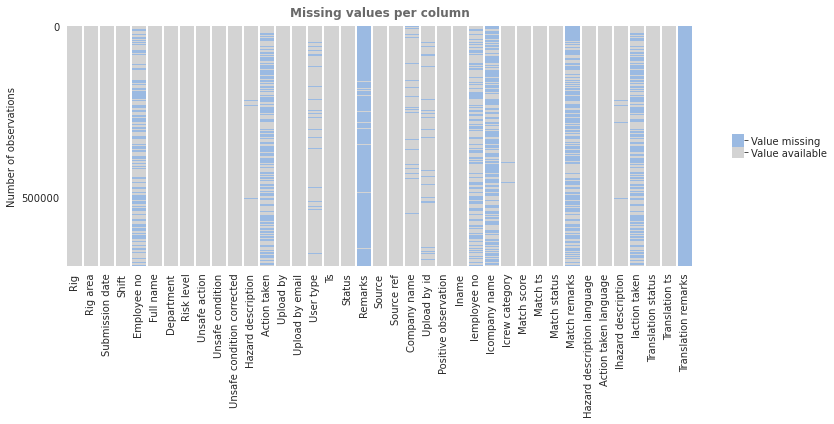

In [42]:
#Creating plot architecture
fig, ax = plt.subplots(figsize = (12, 6))
#Plotting
colors = ["#d3d3d3", "#9BBAE2"]
columns = [name.replace("_"," ").capitalize() for name in formdata.columns]
ax = sns.heatmap(formdata.isnull(), 
                 cmap = sns.color_palette(colors), 
                 cbar_kws = dict(
                     orientation = "vertical", 
                     shrink = 0.1,
                     aspect = 2.0))
#Setting parameters
ax.set_yticks(range(0,len(formdata),500000))
ax.set_yticklabels(range(0,len(formdata),500000))
ax.set_ylabel("Number of observations")
ax.set_xticklabels(columns)
ax.vlines(range(len(formdata.columns)+1), 
          ymin = 0, 
          ymax = len(formdata)-1, 
          color = "white", 
          linewidth = 2)
ax.set_title("Missing values per column",
             color = "#696969",
             weight = "bold",
             size = 12, 
             pad = 10.0)
colorbar = ax.collections[0].colorbar
colorbar.set_ticks([0.25, 0.75])
colorbar.set_ticklabels(["Value available", "Value missing"])
plt.tick_params(bottom = False, left = False)
plt.tight_layout()
save_fig("Missing_Values_formdata")
plt.show();
    

**Rig** column is with abreviations so we need to put the full name to have better comparisons

In [43]:
rig_name_shortcut = ['NG1', 'NMOB', 'NCB', 'NLN', 'NTP', 'NHnD', 'NToM', 'NST', 
                     'NDoT', 'NGdS', 'NBD', 'NSC', 'NSL', 'NG2', 'NRA', 'NFK', 
                     'NSH','NHC', 'NJW', 'NJK', 'NSM', 'NRL',"ng2","nst","nmob"]

rig_name_full = ['Noble Globetrotter I', "Noble Mick O'Brien",
                 'Noble Clyde Boudreaux', 'Noble Lloyd Noble', 'Noble Tom Prosser',
                 'Noble Hans Deul', 'Noble Tom Madden', 'Noble Sam Turner',
                 'Noble Don Taylor', 'Noble Gerry de Souza', 'Noble Bob Douglas',
                 'Noble Sam Croft', 'Noble Stanley Lafosse','Noble Globetrotter II',
                 'Noble Regina Allen', 'Noble Faye Kozack','Noble Sam Hartley', 
                 'Noble Houston Colbert','Noble Johnny Whitstine', 
                 'Noble Joe Knight','Noble Scott Marks', 'Noble Roger Lewis',
                 'Noble Globetrotter II',"Noble Sam Turner","Noble Mick O'Brien"]

formdata["Rig"] = formdata["Rig"].replace(rig_name_shortcut,rig_name_full)

formdata["Rig"].unique()


array(['Dev', 'Noble Lloyd Noble', 'Noble Sam Hartley',
       "Noble Mick O'Brien", 'Noble Joe Knight', 'Noble Sam Turner',
       'Noble Houston Colbert', 'NAR', 'Noble Clyde Boudreaux',
       'Noble Regina Allen', 'Noble Sam Croft', 'Noble Johnny Whitstine',
       'Noble Hans Deul', 'Noble Tom Madden', 'Noble Tom Prosser',
       'Noble Don Taylor', 'Noble Roger Lewis', 'Noble Globetrotter I',
       'Noble Globetrotter II', 'Noble Scott Marks', 'XXX', 'DEV',
       'Noble Bob Douglas', 'Noble Stanley Lafosse', 'undefined', 'PMM',
       'Noble Gerry de Souza', 'PSV', 'PSA', 'XXX2', 'Noble Faye Kozack',
       'XXX3'], dtype=object)

After discussing with FENNEX team, Rigs with names XXX, XXX2, XXX3 and Dev can be removed

In [44]:
XXX = formdata[(formdata["Rig"]=="XXX")].index
XXX2 = formdata[(formdata["Rig"]=="XXX2")].index
XXX3 = formdata[(formdata["Rig"]=="XXX3")].index
DEV = formdata[(formdata["Rig"]=="DEV")].index
Dev = formdata[(formdata["Rig"]=="Dev")].index
Undefined = formdata[(formdata["Rig"]=="undefined")].index
PSA = formdata[(formdata["Rig"]=="PSA")].index
PSV = formdata[(formdata["Rig"]=="PSV")].index
NAR = formdata[(formdata["Rig"]=="NAR")].index

formdata = formdata.drop(XXX)
formdata = formdata.drop(XXX2)
formdata = formdata.drop(XXX3)
formdata = formdata.drop(DEV)
formdata = formdata.drop(Dev)
formdata = formdata.drop(Undefined)
formdata = formdata.drop(PSA)
formdata = formdata.drop(PSV)
formdata = formdata.drop(NAR)
formdata.head()

,Rig,Rig_Area,Submission_Date,Shift,Employee_No,Full_Name,Department,Risk_Level,Unsafe_Action,Unsafe_Condition,...,Match_ts,Match_Status,Match_Remarks,Hazard_Description_Language,Action_Taken_Language,iHazard_Description,iAction_Taken,Translation_Status,Translation_ts,Translation_Remarks
3,Noble Lloyd Noble,1,2020-10-06 00:00:00.000,D,6666666,xxxx,7,Medium,Yes,No,...,2020-12-23 10:53:59.790,True,NaN,en,en,Fennex QAQC Fennex2,Fennex QAQC Fennex2,True,2021-02-19 12:16:30.313,NaN
9,Noble Lloyd Noble,23,2020-10-08 00:00:00.000,N,123,xxxx,8,High,No,No,...,2020-12-23 10:59:14.750,True,NaN,en,en,NLN Test,NLN Test,True,2021-02-19 12:16:30.937,NaN
16,Noble Lloyd Noble,24,2020-10-09 00:00:00.000,D,555555,xxxx,4,High,No,Yes,...,2020-12-23 10:54:23.290,True,NaN,en,en,Fennex QAQC,Fennex QAQC,True,2021-02-19 12:16:30.327,NaN
17,Noble Sam Hartley,24,2020-10-11 00:00:00.000,D,NaN,xxxx,9,Low,No,No,...,2020-12-23 17:13:53.867,True,NaN,en,en,checked shalers flow line for covers. Covers i...,Nose required. Good safe compliant operations ...,True,2021-02-19 12:17:08.803,NaN
18,Noble Mick O'Brien,23,2020-10-12 00:00:00.000,D,NaN,xxxx,9,Low,No,No,...,2020-12-23 17:15:37.537,True,NaN,en,en,Inside moonpool there is sound double earplug ...,Double earplug Needed,True,2021-02-19 12:17:19.483,NaN


In [45]:
formdata["Rig"].unique()

array(['Noble Lloyd Noble', 'Noble Sam Hartley', "Noble Mick O'Brien",
       'Noble Joe Knight', 'Noble Sam Turner', 'Noble Houston Colbert',
       'Noble Clyde Boudreaux', 'Noble Regina Allen', 'Noble Sam Croft',
       'Noble Johnny Whitstine', 'Noble Hans Deul', 'Noble Tom Madden',
       'Noble Tom Prosser', 'Noble Don Taylor', 'Noble Roger Lewis',
       'Noble Globetrotter I', 'Noble Globetrotter II',
       'Noble Scott Marks', 'Noble Bob Douglas', 'Noble Stanley Lafosse',
       'PMM', 'Noble Gerry de Souza', 'Noble Faye Kozack'], dtype=object)

**Feature Engineering** is needed here to extract the year, day and month from the date

In [46]:
#Convert Date column to datetime type 
formdata['Submission_Date']= pd.to_datetime(formdata['Submission_Date'])

#Extract year, month and day and add them to new columns
formdata['year'] = pd.to_datetime(formdata['Submission_Date']).dt.year
formdata['month'] = pd.to_datetime(formdata['Submission_Date']).dt.month
formdata['month_name'] = pd.to_datetime(formdata['Submission_Date']).dt.month_name()
formdata['day'] = pd.to_datetime(formdata['Submission_Date']).dt.day
formdata['day_name'] = pd.to_datetime(formdata['Submission_Date']).dt.day_name()
#formdata['year_month'] = pd.to_datetime(formdata['Submission_Date']).dt.strftime('%b-%Y')
formdata['year_month'] = pd.to_datetime(formdata['Submission_Date']).dt.strftime('%Y-%m')

formdata = formdata.sort_values("Submission_Date")

#resetting index and dropping the column index
formdata = formdata.reset_index(drop=True)
formdata.head()


,Rig,Rig_Area,Submission_Date,Shift,Employee_No,Full_Name,Department,Risk_Level,Unsafe_Action,Unsafe_Condition,...,iAction_Taken,Translation_Status,Translation_ts,Translation_Remarks,year,month,month_name,day,day_name,year_month
0,Noble Lloyd Noble,1,2020-10-06,D,6666666,xxxx,7,Medium,Yes,No,...,Fennex QAQC Fennex2,True,2021-02-19 12:16:30.313,NaN,2020,10,October,6,Tuesday,2020-10
1,Noble Lloyd Noble,23,2020-10-08,N,123,xxxx,8,High,No,No,...,NLN Test,True,2021-02-19 12:16:30.937,NaN,2020,10,October,8,Thursday,2020-10
2,Noble Lloyd Noble,24,2020-10-09,D,555555,xxxx,4,High,No,Yes,...,Fennex QAQC,True,2021-02-19 12:16:30.327,NaN,2020,10,October,9,Friday,2020-10
3,Noble Sam Hartley,24,2020-10-11,D,NaN,xxxx,9,Low,No,No,...,Nose required. Good safe compliant operations ...,True,2021-02-19 12:17:08.803,NaN,2020,10,October,11,Sunday,2020-10
4,Noble Mick O'Brien,23,2020-10-12,D,NaN,xxxx,9,Low,No,No,...,Double earplug Needed,True,2021-02-19 12:17:19.483,NaN,2020,10,October,12,Monday,2020-10


We can observe that column **Translation_Remarks** has **100% of missing values** so we can proceed in dropping it. 

In [47]:
formdata = formdata.drop(columns= ["Translation_Remarks"])

We can observe that column **remarks** has **97.24% of missing values**. After below research, this columns only shows if a specific row has been updated, the time of the update and by which user. This is not useful as it doesn't provide any extra details, therefore we can proceed in dropping it. 

In [48]:
#check what "remarks" column shows by creating a new dataframe to check
demo1 = formdata[~formdata['remarks'].isnull()]
demo1[["remarks","ts", "Submission_Date"]].head()

,remarks,ts,Submission_Date
8949,Last Updated on 12/1/2020 11:54:29 AM by stsnj...,2020-12-01 11:54:29.953,2020-11-20
16597,Last Updated on 12/8/2020 10:44:09 AM by stsnj...,2020-12-08 10:44:09.570,2020-11-30
16664,Last Updated on 12/1/2020 1:20:01 PM by mednmo...,2020-12-01 13:20:01.840,2020-12-01
16705,Last Updated on 12/1/2020 12:05:13 PM by stsnj...,2020-12-01 12:05:13.343,2020-12-01
16706,Last Updated on 12/1/2020 12:03:21 PM by stsnj...,2020-12-01 12:03:21.350,2020-12-01


In [49]:
#check the full remarks line to see the complete data
list(demo1["remarks"][:20])


['Last Updated on 12/1/2020 11:54:29 AM by stsnjk@noblecorp.com',
 'Last Updated on 12/8/2020 10:44:09 AM by stsnjw@noblecorp.com',
 'Last Updated on 12/1/2020 1:20:01 PM by mednmob@noblecorp.com',
 'Last Updated on 12/1/2020 12:05:13 PM by stsnjk@noblecorp.com',
 'Last Updated on 12/1/2020 12:03:21 PM by stsnjk@noblecorp.com',
 'Last Updated on 12/1/2020 12:02:45 PM by stsnjk@noblecorp.com',
 'Last Updated on 12/1/2020 11:59:39 AM by stsnjk@noblecorp.com',
 'Last Updated on 12/1/2020 11:59:04 AM by stsnjk@noblecorp.com',
 'Last Updated on 12/1/2020 11:57:51 AM by stsnjk@noblecorp.com',
 'Last Updated on 12/1/2020 11:55:25 AM by stsnjk@noblecorp.com',
 'Last Updated on 12/1/2020 6:08:51 PM by stsshartley@noblecorp.com',
 'Last Updated on 12/1/2020 11:53:14 AM by stsnjk@noblecorp.com',
 'Last Updated on 12/1/2020 11:52:07 AM by stsnjk@noblecorp.com',
 'Last Updated on 12/1/2020 11:50:32 AM by stsnjk@noblecorp.com',
 'Last Updated on 12/1/2020 11:49:49 AM by stsnjk@noblecorp.com',
 'Last

In [50]:
formdata = formdata.drop(columns= ["remarks"])

**Match_Remarks** column has **58.13%** of missing values. When checking to see the values this column has, it had three different ones: NaN, Employee ID based Matching Done & 'Edited/Approved by [user_email] on [date]'. This column is not necessary hence we can drop it. 

In [51]:
formdata[["Match_Remarks"]].head(10)
formdata[["Match_Remarks"]].loc[[1,50,1549]]


,Match_Remarks
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
5,NaN
6,NaN
7,NaN
8,NaN
9,NaN


,Match_Remarks
1,NaN
50,NaN
1549,NaN


In [52]:
formdata = formdata.drop(columns = ["Match_Remarks"])

**Action_Taken** column has **52.76% missing values** and **iAction_Taken** column has **52.65% missing values**. After comparing them together, it is observed that they both show the same information. To avoid multicollinearity, one of them needs to be dropped. Action_Taken column is dropped as it's the one with the most missing values compared to iAction_Taken and also iAction_Taken seems to be more complete and have all the comments in english. 

In [53]:
formdata[["Action_Taken", "iAction_Taken"]].head(20)
formdata[["Action_Taken", "iAction_Taken"]].loc[[5656, 2345, 3498, 383]]


,Action_Taken,iAction_Taken
0,Fennex QAQC Fennex2,Fennex QAQC Fennex2
1,NLN Test,NLN Test
2,Fennex QAQC,Fennex QAQC
3,Nose required. Good safe compliant operations ...,Nose required. Good safe compliant operations ...
4,Double earplug Needed,Double earplug Needed
5,Action testing,Action testing
6,Testing Action,Testing Action
7,NaN,NaN
8,NaN,NaN
9,\nNo action is needed this is just a QA QC obs...,\nNo action is needed this is just a QA QC obs...


,Action_Taken,iAction_Taken
5656,good job,good job
2345,NaN,NaN
3498,NaN,NaN
383,NaN,NaN


In [54]:
formdata = formdata.drop(columns= ["Action_Taken"])

Also, to better input this data into the model, we will convert NaN values to 0 and all the rows which have an action taken with 1. 

In [55]:
formdata["iAction_Taken"] = formdata["iAction_Taken"].fillna(0)
formdata["iAction_Taken"] = np.where(formdata["iAction_Taken"]!=0, 1, formdata["iAction_Taken"])


Moving on to the next column which has the highest missing values is **iCompany_Name** with **60.21%**. As a first step, NaN values of the iCompany_Name column were filled up with the values from the Company_Name column leading to a 5.39% of missing values. To avoid multicollinearity between these two columns, we would need to drop one. Company_Name column will be dropped as it has the highest percentage of missing values compared to iCompany_Name.

In [56]:
formdata[["Company_Name","iCompany_Name"]].head(20)

,Company_Name,iCompany_Name
0,FNX,MI SWACO
1,FNX,NaN
2,Noble,MI SWACO
3,CNOOC,OTHER
4,Seasite,OTHER
5,Fennex,MI SWACO
6,Fennex,MI SWACO
7,Noble,NaN
8,NOBLE,BAKER HUGHES
9,fennex,OTHER


In [57]:
# fill the NaN values in iCompany_Name column with the Company_Name column 
# if it has a value
formdata['iCompany_Name'] = formdata['iCompany_Name'].fillna(formdata['Company_Name'])

#convert all values in the iCompany_Name column to uppercase
formdata['iCompany_Name'] = formdata['iCompany_Name'].str.upper()


In [58]:
# Some company names are pointing to the same one but they are spelled differently
# so trying to match them
noble_names = ["Noble","noble","NoBle","NOBVE","NOBL","NOIBLE","NOBLE DRILLING","No bly","NORLE","No Bie","NOBLE-","NOBLE ","NOBIE","NOble"]
qatar_gas_names = ["QG","QATAR GAS "]
formdata['iCompany_Name'] = np.where(formdata['iCompany_Name'].str.contains('|'.join(noble_names), na = False), "NOBLE", formdata['iCompany_Name'])
formdata['iCompany_Name'] = np.where(formdata['iCompany_Name'].str.contains('|'.join(qatar_gas_names), na = False), "QATAR GAS", formdata['iCompany_Name'])


In [59]:
formdata["iCompany_Name"].unique()

array(['MI SWACO', 'FNX', 'OTHER', ..., 'JAMES MCCAIN', '141593',
       'SLB CEMENTING'], dtype=object)

In [60]:
formdata = formdata.drop(columns = ["Company_Name"])

After discussing with the FENNEX, all missing Company Names are for Noble employess and not for external employees. Therefore, all NaN values have been filled out with NOBLE.

In [61]:
formdata['iCompany_Name'] = formdata['iCompany_Name'].fillna("NOBLE")
formdata[formdata["iCompany_Name"].isna()]


,Rig,Rig_Area,Submission_Date,Shift,Employee_No,Full_Name,Department,Risk_Level,Unsafe_Action,Unsafe_Condition,...,iHazard_Description,iAction_Taken,Translation_Status,Translation_ts,year,month,month_name,day,day_name,year_month


**Employee_No** has **43.85%** of missing values where **iEmployee_No** has **38.87% missing values**. Just for multicollinearity issues, one of them needs to be deleted. As they have matching values, Employee_No column will be dropped because it has more missing values. 

In [62]:
# fill the NaN values in iCompany_Name column with the Company_Name column 
# if it has a value
formdata['iEmployee_No'] = formdata['iEmployee_No'].fillna(formdata['Employee_No'])

# drop column Employee_No
formdata = formdata.drop(columns = ["Employee_No"])

In [63]:
# formdata[["iEmployee_No"]]
# type(formdata["iEmployee_No"][1]) # digits which have dtype str
# type(formdata["iEmployee_No"][542743]) # float 
# type(formdata["iEmployee_No"][1009]) # word HEBERT which is a string 


In [64]:
#transform values in column to numeric and if they are non numeric, fill with 0

# formdata["iEmployee_No"] = (
#     pd.to_numeric(formdata["iEmployee_No"],
#                   errors='coerce')
#       .fillna(0)
#     )

In [65]:
# formdata["iEmployee_No"] = formdata["iEmployee_No"].astype(dtype = int)
# formdata["iEmployee_No"]
# type(formdata["iEmployee_No"][1])
# type(formdata["iEmployee_No"][1009])



**iHazard_Description** doesn't have a lot of **missing values (1.11%)** but it has multicollinearity issues with **Hazard_Description** which contains **1.06% missing values**. Therefore, one of them needs to be dropped. After filling up NaN values of iHazard Description with a value from Hazard_Description (if any), then Hazard_Description column was dropped. 


In [66]:
formdata[["iHazard_Description","Hazard_Description"]].head()

,iHazard_Description,Hazard_Description
0,Fennex QAQC Fennex2,Fennex QAQC Fennex2
1,NLN Test,NLN Test
2,Fennex QAQC,Fennex QAQC
3,checked shalers flow line for covers. Covers i...,checked shalers flow line for covers. Covers i...
4,Inside moonpool there is sound double earplug ...,Inside moonpool there is sound double earplug ...


In [67]:
# show only the rows which are different 
formdata[["iHazard_Description","Hazard_Description"]].query('iHazard_Description != Hazard_Description')




,iHazard_Description,Hazard_Description
71,NaN,NaN
324,"We've cleaned The Ingen Room, arranged the pla...",لقد قمنا بتنظيف الانجن رووم وترتيب المكان واعا...
439,NaN,NaN
468,NaN,NaN
501,NaN,NaN
...,...,...
700401,NaN,Personnel removing boots so not to walk in the...
700403,NaN,I observed guys using good teamwork and the pr...
700447,NaN,Need to improve the basic duties and responsib...
700502,NaN,ob#erved person ascending on the stair not hol...


In [68]:
# fill the NaN values in iHazard_Description column with the Hazard_Description column 
# if it has a value
formdata['iHazard_Description'] = formdata['iHazard_Description'].fillna(formdata['Hazard_Description'])

# drop column Hazard_Description
formdata = formdata.drop(columns = ["Hazard_Description"])


Also, to better input this data into the model, we will convert NaN values to 0 and all the rows which have an action taken with 1. 

In [69]:
formdata["iHazard_Description"] = formdata["iHazard_Description"].fillna(0)
formdata["iHazard_Description"] = np.where(formdata["iHazard_Description"]!=0, 1, formdata["iHazard_Description"])


Some columns need to be deleted as we do not have the data. Having the names of the employees wasn't necessary for this project as we focus more on manager and rig level. 

In [70]:
formdata["Upload_By"].unique()
formdata["Upload_By_Email"].unique()
formdata["Full_Name"].unique()
formdata["iName"].unique()


array(['xxxx'], dtype=object)

array(['xxxx'], dtype=object)

array(['xxxx'], dtype=object)

array(['xxxx', nan], dtype=object)

In [71]:
# drop unecessary columns
formdata = formdata.drop(columns = ["Upload_By", "Upload_By_Email", "Full_Name","iName"])


Dropping columns with unique values

In [72]:
formdata = formdata.drop(columns = ["status"])

Modify some column which only have Yes/No values to 1/0 in order to be better understood by the model. 

In [73]:
formdata["Unsafe_Action"] = np.where(formdata["Unsafe_Action"]== "Yes", 1, 0)
formdata["Unsafe_Condition"] = np.where(formdata["Unsafe_Condition"]== "Yes", 1, 0)
formdata["Unsafe_Condition_Corrected"] = np.where(formdata["Unsafe_Condition_Corrected"]== "Yes", 1, 0)
formdata["Positive_Observation"] = np.where(formdata["Positive_Observation"]== "Yes", 1, 0)
formdata["Match_Status"] = np.where(formdata["Match_Status"]== True, 1, 0)
formdata["Translation_Status"] = np.where(formdata["Translation_Status"]== True, 1, 0)

formdata.head()


,Rig,Rig_Area,Submission_Date,Shift,Department,Risk_Level,Unsafe_Action,Unsafe_Condition,Unsafe_Condition_Corrected,User_Type,...,iHazard_Description,iAction_Taken,Translation_Status,Translation_ts,year,month,month_name,day,day_name,year_month
0,Noble Lloyd Noble,1,2020-10-06,D,7,Medium,1,0,1,Noble,...,1,1,1,2021-02-19 12:16:30.313,2020,10,October,6,Tuesday,2020-10
1,Noble Lloyd Noble,23,2020-10-08,N,8,High,0,0,1,Noble,...,1,1,1,2021-02-19 12:16:30.937,2020,10,October,8,Thursday,2020-10
2,Noble Lloyd Noble,24,2020-10-09,D,4,High,0,1,1,Noble,...,1,1,1,2021-02-19 12:16:30.327,2020,10,October,9,Friday,2020-10
3,Noble Sam Hartley,24,2020-10-11,D,9,Low,0,0,0,Noble,...,1,1,1,2021-02-19 12:17:08.803,2020,10,October,11,Sunday,2020-10
4,Noble Mick O'Brien,23,2020-10-12,D,9,Low,0,0,1,Noble,...,1,1,1,2021-02-19 12:17:19.483,2020,10,October,12,Monday,2020-10


Saving figure Risk_Level


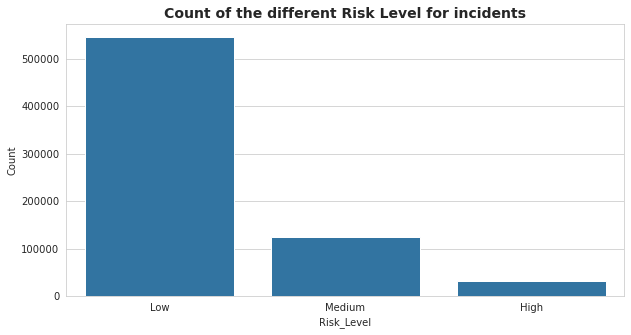

In [74]:
# for data exploration purposes
plt.figure(figsize=(10, 5))
formdata["Risk_Level"].value_counts()

ax = sns.countplot(x="Risk_Level", 
                   data=formdata, 
                   order = formdata["Risk_Level"].value_counts(ascending=False).index,
                   color="tab:blue"
             )
_ = ax.set_xlabel("Risk_Level")
_ = ax.set_ylabel("Count")
_ = ax.set_title("Count of the different Risk Level for incidents",fontweight='bold', fontsize=14)

save_fig("Risk_Level")
plt.show();


Saving figure risk_levels_per_rig


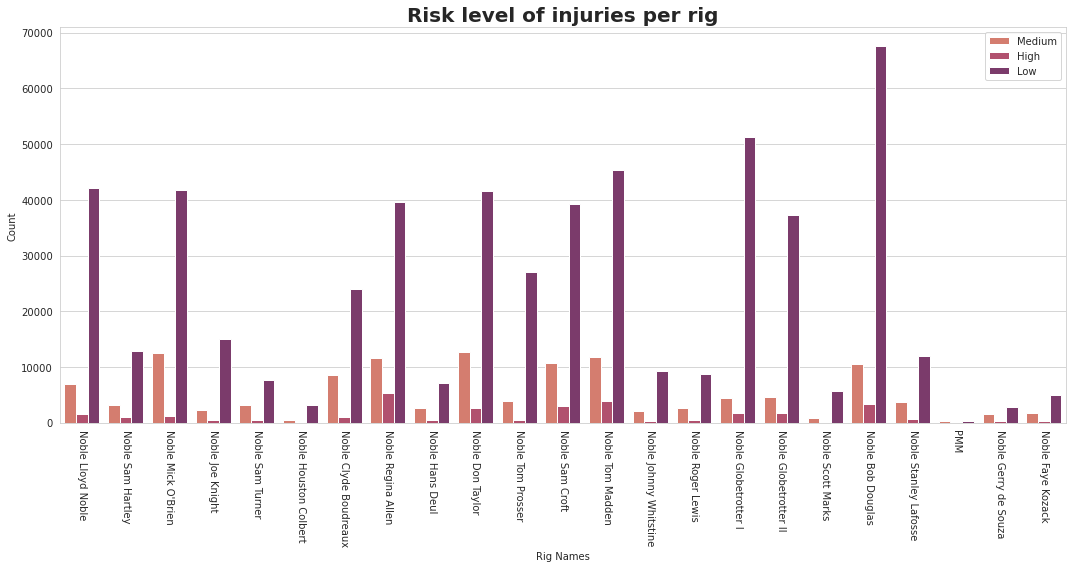

In [75]:
#Visualise the Injury Classifications in a bar plot
# for data exploration purposes

plt.figure(figsize=(15,8))

ax = sns.countplot(x="Rig", data=formdata, hue="Risk_Level", palette="flare");
#ticks = ["No", "Yes"]
#_ = ax.set_xticklabels(ticks)
_ = ax.set_title("Risk level of injuries per rig", fontweight='bold', fontsize=20)
_ = ax.set_xlabel("Rig Names")
_ = ax.set_ylabel("Count")
_ = plt.legend(loc='upper right')
plt.xticks(rotation=-90)
plt.tight_layout()
save_fig("risk_levels_per_rig")
plt.show();


In [76]:
company_name = formdata.groupby(["iCompany_Name"]).size().reset_index()
company_name = company_name.rename(columns = {0:"Count_of_Events_per_company"})
company_name = company_name.sort_values(by=['Count_of_Events_per_company'], ascending=False).reset_index(drop=True)
company_name = company_name.drop(3).reset_index()
company_name = company_name.head(20)
company_name
company_name.to_csv("./Datasets/wordcount.csv")


,index,iCompany_Name,Count_of_Events_per_company
0,0,NOBLE,338806
1,1,JSL,39487
2,2,SCHLUMBERGER,30067
3,4,HALLIBURTON,16827
4,5,BAKER HUGHES,16771
5,6,ESS,15269
6,7,EXXONMOBIL,10466
7,8,WEATHERFORD,9622
8,9,MI SWACO,8444
9,10,ATLAS,8364


In [77]:
# Export cleaned Dataset
formdata.to_csv("./Datasets/Cleaned_formdata.csv")

## Named Crew Participation Data

**Source:** Fennex Database - extracted data from Azure Data Studio<br> 
**Info:** This dataset includes all the people per rig and company and their participation:<br>
 'RowId', 'Date', 'Rig_Name', 'Category', 'Company', 'Full_Name', 'Count'

In [78]:
#Importing named crew participation data for dates between 2021-01-01 to 2022-01-01
named_crew_participation = pd.read_csv("./Datasets/Named_Crew_Participation_Data.csv")
named_crew_participation.head()


,RowId,Date,Rig_Name,Category,Company,Full_Name,Count
0,20496861,2022-03-22,NTP,Other,NaN,xxxx,0
1,20496860,2022-03-22,NTP,Other,NaN,xxxx,0
2,20496859,2022-03-22,NTP,Other,NaN,xxxx,0
3,20496858,2022-03-22,NTP,Other,NaN,xxxx,0
4,20496857,2022-03-22,NTP,Other,NaN,xxxx,0


In [79]:
# print dataset shape to see what it consists of
print('The dataset has {0} rows and {1} columns'.format(named_crew_participation.shape[0],named_crew_participation.shape[1]))


The dataset has 816963 rows and 7 columns


In [80]:
#Checking share of missing and unique values to determine columns to drop
share_missing_values(named_crew_participation)


,share_of_missing_values,count_of_unique_values
Company,54.61%,414
RowId,0.0%,816963
Date,0.0%,415
Rig_Name,0.0%,23
Category,0.0%,9
Full_Name,0.0%,1
Count,0.0%,28


Saving figure Missing_Values_named_crew_participation


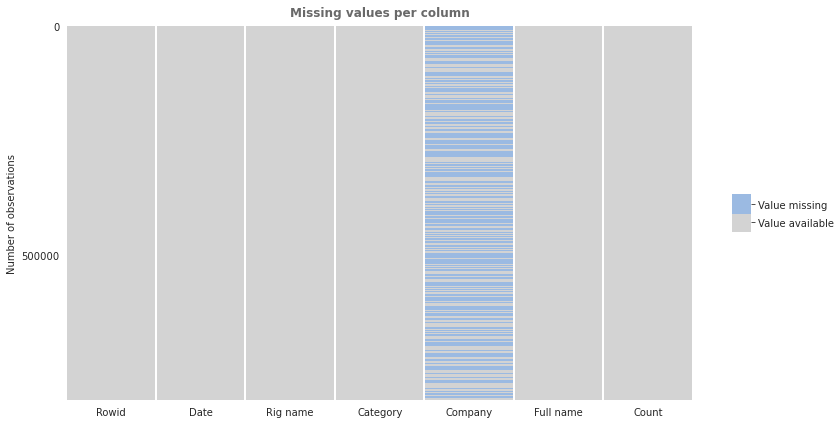

In [81]:
#Visualizing missing values
#Creating plot architecture
fig, ax = plt.subplots(figsize = (12, 6))

#Plotting
colors = ["#d3d3d3", "#9BBAE2"]
columns = [name.replace("_"," ").capitalize() for name in named_crew_participation.columns]
ax = sns.heatmap(named_crew_participation.isnull(), 
                 cmap = sns.color_palette(colors), 
                 cbar_kws = dict(
                     orientation = "vertical", 
                     shrink = 0.1,
                     aspect = 2.0))

#Setting parameters
ax.set_yticks(range(0,len(named_crew_participation),500000))
ax.set_yticklabels(range(0,len(named_crew_participation),500000))
ax.set_ylabel("Number of observations")
ax.set_xticklabels(columns)
ax.vlines(range(len(named_crew_participation.columns)+1), 
          ymin = 0, 
          ymax = len(named_crew_participation)-1, 
          color = "white", 
          linewidth = 2)
ax.set_title("Missing values per column",
             color = "#696969",
             weight = "bold",
             size = 12, 
             pad = 10.0)
colorbar = ax.collections[0].colorbar
colorbar.set_ticks([0.25, 0.75])
colorbar.set_ticklabels(["Value available", "Value missing"])
plt.tick_params(bottom = False, left = False)
plt.tight_layout()
save_fig("Missing_Values_named_crew_participation")
plt.show();

In [82]:
#Convert Date column to datetime type 
named_crew_participation['Date']= pd.to_datetime(named_crew_participation['Date'])

#Extract year, month and day and add them to new columns
named_crew_participation['year'] = pd.to_datetime(named_crew_participation['Date']).dt.year
named_crew_participation['month'] = pd.to_datetime(named_crew_participation['Date']).dt.month
named_crew_participation['month_name'] = pd.to_datetime(named_crew_participation['Date']).dt.month_name()
named_crew_participation['day'] = pd.to_datetime(named_crew_participation['Date']).dt.day
named_crew_participation['day_name'] = pd.to_datetime(named_crew_participation['Date']).dt.day_name()

named_crew_participation = named_crew_participation.sort_values("Date")

#resetting index and dropping the column index
named_crew_participation = named_crew_participation.reset_index(drop=True)
named_crew_participation.head()

# print updated dataset shape to see what it consists of
print('The dataset has {0} rows and {1} columns'.format(named_crew_participation.shape[0],named_crew_participation.shape[1]))


,RowId,Date,Rig_Name,Category,Company,Full_Name,Count,year,month,month_name,day,day_name
0,110610,2021-01-01,NBD,Catering,JSL,xxxx,0,2021,1,January,1,Friday
1,111832,2021-01-01,NRL,Noble National,NaN,xxxx,0,2021,1,January,1,Friday
2,111831,2021-01-01,NRL,Noble National,NaN,xxxx,0,2021,1,January,1,Friday
3,111830,2021-01-01,NRL,Noble National,NaN,xxxx,1,2021,1,January,1,Friday
4,111829,2021-01-01,NRL,Noble National,NaN,xxxx,1,2021,1,January,1,Friday


The dataset has 816963 rows and 12 columns


Some columns need to be deleted as we do not have the data. Having the names of the employees wasn't necessary for this project as we focus more on manager and rig level. 

In [83]:
named_crew_participation["Full_Name"].unique()

array(['xxxx'], dtype=object)

In [84]:
named_crew_participation = named_crew_participation.drop(columns=["Full_Name"])


After discussing with the FENNEX, all missing Company Names are for Noble employess and not for external employees. Therefore, all NaN values have been filled out with NOBLE.

In [85]:
named_crew_participation['Company'] = named_crew_participation['Company'].fillna("NOBLE")
named_crew_participation[named_crew_participation["Company"].isna()]


,RowId,Date,Rig_Name,Category,Company,Count,year,month,month_name,day,day_name


Saving figure Crew_Categories


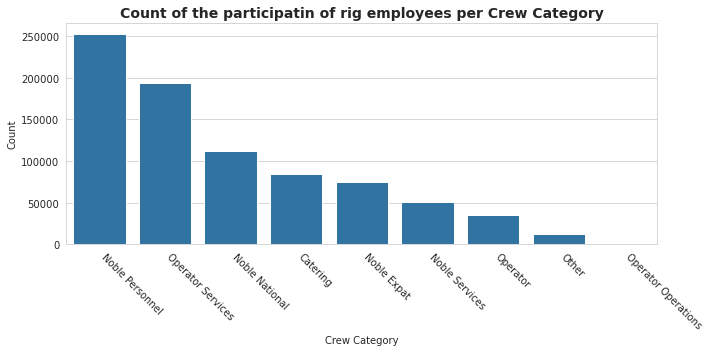

In [99]:
# for data exploration purposes
plt.figure(figsize=(10, 5))
named_crew_participation["Category"].value_counts()

ax = sns.countplot(x="Category", 
                   data=named_crew_participation, 
                   order = named_crew_participation["Category"].value_counts(ascending=False).index,
                   color="tab:blue"
             )
ax.set_xlabel("Crew Category")
ax.set_ylabel("Count")
ax.set_title("Count of the participatin of rig employees per Crew Category",fontweight='bold', fontsize=14)
#plt.xticks(rotation=-10)
plt.setp( ax.xaxis.get_majorticklabels(), rotation=-45, ha="left" )
plt.tight_layout()
save_fig("Crew_Categories")
plt.show();


In [86]:
# Export cleaned Dataset
named_crew_participation.to_csv("./Datasets/Cleaned_named_crew_participation.csv")

## POB HSE

**Source:** Fennex Database - extractd data from Azure Data Studio<br> 
**Info:** This dataset includes all the people on board:<br>
'Rig',
 'Crew_Category',
 'Rig_Type',
 'Operator',
 'Region',
 'Date',
 'POB',
 'First_Name',
 'Last_Name',
 'WorkdayId',
 'Company',
 'ArrivalDate',
 'DepartureDate',
 'POB_UID',
 'Last_Edit_Date',
 'Inserted_TS',
 'Position',
 'Well Name'
 
 Hint: Rig Type "DS" means Drillship

In [100]:
#Importing POB HSE data for dates between 2020-10-01 to 2022-03-31
POB_HSE = pd.read_csv("./Datasets/POB_HSE.csv")
POB_HSE.head()

,Rig,Crew_Category,Rig_Type,Operator,Region,Date,POB,First_Name,Last_Name,WorkdayId,Company,ArrivalDate,DepartureDate,POB_UID,Last_Edit_Date,Inserted_TS,Position,Well Name
0,Noble Don Taylor,Noble National,DS,ESSO Exploration and Production Guyana Limited,South America,2020-10-01 00:00:00.000,1.0,xxxx,xxxx,145074.0,NaN,2020-09-04 09:00:00.000,2020-10-29 00:00:00.000,2c9e809374c719140174e2b13f480c28,2020-10-02 00:14:04.667,2022-01-17 16:08:15.950,Roustabout,LIZ-3P21
1,Noble Don Taylor,Noble Services,DS,ESSO Exploration and Production Guyana Limited,South America,2020-10-01 00:00:00.000,1.0,xxxx,xxxx,401300.0,Other,2020-09-30 07:10:00.000,2020-11-30 00:00:00.000,2c9e809374c719140174e2b13f600c2a,2020-10-02 00:14:04.180,2022-01-17 16:08:15.950,Globe Riser-Technician,LIZ-3P21
2,Noble Don Taylor,Operator,DS,ESSO Exploration and Production Guyana Limited,South America,2020-10-01 00:00:00.000,1.0,xxxx,xxxx,400565.0,ExxonMobil,2020-09-30 07:10:00.000,2020-11-30 00:00:00.000,2c9e809374c719140174e2b13f650c2c,2020-10-02 00:14:04.400,2022-01-17 16:08:15.950,Ops Supervisor,LIZ-3P21
3,Noble Don Taylor,Noble Services,DS,ESSO Exploration and Production Guyana Limited,South America,2020-10-01 00:00:00.000,1.0,xxxx,xxxx,401301.0,Other,2020-09-30 07:10:00.000,2020-11-30 00:00:00.000,2c9e809374c719140174e2b13f6a0c2e,2020-10-02 00:14:04.993,2022-01-17 16:08:15.950,Globe Riser-Technician,LIZ-3P21
4,Noble Don Taylor,Noble Services,DS,ESSO Exploration and Production Guyana Limited,South America,2020-10-01 00:00:00.000,1.0,xxxx,xxxx,401202.0,Other,2020-09-30 07:10:00.000,2020-11-30 00:00:00.000,2c9e809374c719140174e2b13f700c30,2020-10-02 00:14:04.587,2022-01-17 16:08:15.950,Techniocian,LIZ-3P21


In [101]:
#Convert Date column to datetime type 
POB_HSE['ArrivalDate']= pd.to_datetime(POB_HSE['ArrivalDate'])
POB_HSE['DepartureDate']= pd.to_datetime(POB_HSE['DepartureDate'])
POB_HSE['Date']= pd.to_datetime(POB_HSE['Date'])


Operating companies seem to play a role in the number of accidents as from this paper's findings, there are three companies which seem to have a lot more incidents than the others.

**Normalisation of this data is necessary to take account of the number of installations each company has and the total number of people (direct staff and contractors) working on all the company’s installations.**

 We also need to do this for crew category maybe and position


In [102]:
# print dataset shape to see what it consists of
print('The dataset has {0} rows and {1} columns'.format(POB_HSE.shape[0],POB_HSE.shape[1]))


The dataset has 1089198 rows and 18 columns


In [103]:
#Checking share of missing and unique values to determine columns to drop
share_missing_values(POB_HSE)


,share_of_missing_values,count_of_unique_values
Company,54.32%,356
WorkdayId,42.1%,7609
Operator,3.08%,30
Position,0.0%,5154
Inserted_TS,0.0%,547
Last_Edit_Date,0.0%,1031454
POB_UID,0.0%,1089198
DepartureDate,0.0%,6760
ArrivalDate,0.0%,8440
Rig,0.0%,23


Saving figure Missing_Values_POB_HSE


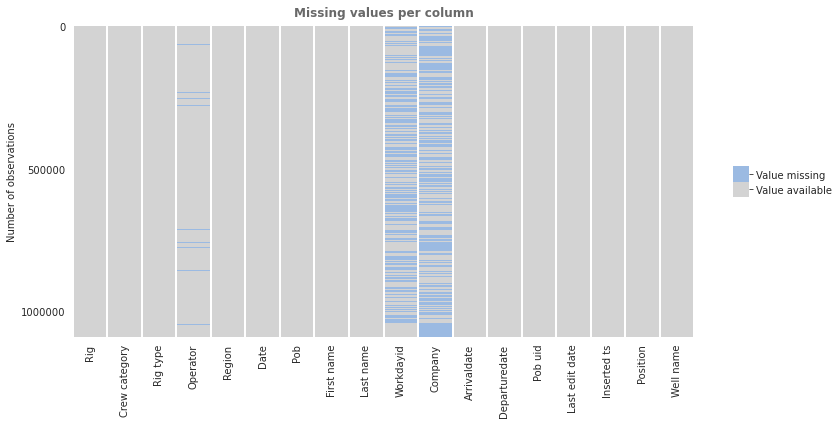

In [104]:
#Visualizing missing values
#Creating plot architecture
fig, ax = plt.subplots(figsize = (12, 6))

#Plotting
colors = ["#d3d3d3", "#9BBAE2"]
columns = [name.replace("_"," ").capitalize() for name in POB_HSE.columns]
ax = sns.heatmap(POB_HSE.isnull(), 
                 cmap = sns.color_palette(colors), 
                 cbar_kws = dict(
                     orientation = "vertical", 
                     shrink = 0.1,
                     aspect = 2.0))

#Setting parameters
ax.set_yticks(range(0,len(POB_HSE),500000))
ax.set_yticklabels(range(0,len(POB_HSE),500000))
ax.set_ylabel("Number of observations")
ax.set_xticklabels(columns)
ax.vlines(range(len(POB_HSE.columns)+1), 
          ymin = 0, 
          ymax = len(POB_HSE)-1, 
          color = "white", 
          linewidth = 2)
ax.set_title("Missing values per column",
             color = "#696969",
             weight = "bold",
             size = 12, 
             pad = 10.0)
colorbar = ax.collections[0].colorbar
colorbar.set_ticks([0.25, 0.75])
colorbar.set_ticklabels(["Value available", "Value missing"])
plt.tick_params(bottom = False, left = False)
plt.tight_layout()
save_fig("Missing_Values_POB_HSE")
plt.show();

Some columns need to be deleted as we do not have the data. Having the names of the employees wasn't necessary for this project as we focus more on manager and rig level. 

In [105]:
POB_HSE["First_Name"].unique()
POB_HSE["Last_Name"].unique()

#also need to remove columns with unique identifiers 
POB_HSE["POB"].unique()

array(['xxxx'], dtype=object)

array(['xxxx'], dtype=object)

array([1.])

In [106]:
POB_HSE = POB_HSE.drop(columns = ["First_Name","Last_Name","POB"])

Saving figure Region_POB_HSE


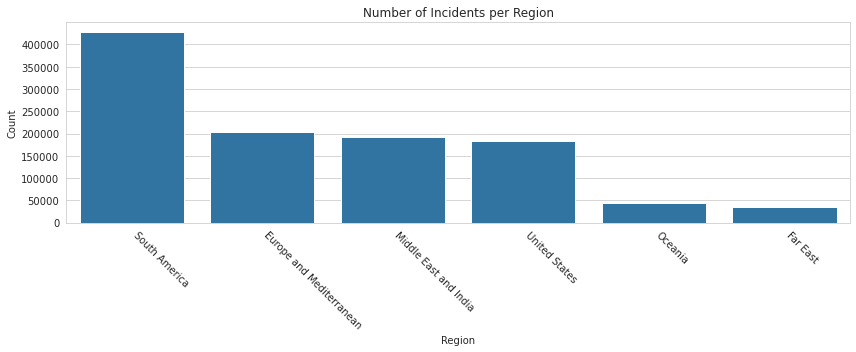

In [112]:
# for data exploration purposes
plt.figure(figsize=(12, 5))
POB_HSE["Region"].value_counts()

ax = sns.countplot(x="Region", 
                   data=POB_HSE, 
                   order = POB_HSE["Region"].value_counts(ascending=False).index,
                   color="tab:blue"
             )
ax.set_xlabel("Region")
ax.set_ylabel("Count")
ax.set_title("Number of Incidents per Region")
plt.setp( ax.xaxis.get_majorticklabels(), rotation=-45, ha="left" )
plt.tight_layout()
save_fig("Region_POB_HSE")
plt.show();



After discussing with the FENNEX, all missing Company Names are for Noble employess and not for external employees. Therefore, all NaN values have been filled out with NOBLE.

In [108]:
POB_HSE["Company"] = POB_HSE["Company"].fillna("NOBLE")
POB_HSE[POB_HSE["Company"].isna()]


,Rig,Crew_Category,Rig_Type,Operator,Region,Date,WorkdayId,Company,ArrivalDate,DepartureDate,POB_UID,Last_Edit_Date,Inserted_TS,Position,Well Name


In [109]:
pacific = POB_HSE[(POB_HSE["Rig"]=="Pacific Meltem")].index
POB_HSE = POB_HSE.drop(pacific)

In [110]:
#Same operator so making the name the be equal everywhere
POB_HSE["Operator"] = POB_HSE["Operator"].replace("ESSO EXPLORATION AND PRODUCTION GUYANA LIMITED","ESSO Exploration and Production Guyana Limited")
POB_HSE["Operator"] = POB_HSE["Operator"].replace("Esso Exploration and Production Guyana Limited","ESSO Exploration and Production Guyana Limited")


In [111]:
# Export cleaned Dataset
POB_HSE.to_csv("./Datasets/Cleaned_POB_HSE.csv")